In [1]:
# LIBRARIES
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Understanding how Beautiful Soup works.

In [2]:
# Website link

Site = 'https://news.google.com/search?q=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

Page = requests.get(Site)

In [3]:
DataCollected = BeautifulSoup( Page.text, 'html.parser')

In [4]:
# Extract string from page title
DataCollected.title.string

'Google Notícias - Pesquisar'

In [5]:
# Extract html tag
DataCollected.title.name

'title'

In [6]:
# Gets the news title
DataCollected.find( class_= 'ipQwMb ekueJc RD0gLb').string

'Americanas tem reunião decisiva com credores nesta quinta-feira'

In [7]:
# Gets the title tag
DataCollected.find( class_= 'ipQwMb ekueJc RD0gLb').name

'h3'

In [8]:
# How many tags contains in the page
len( DataCollected.find_all('div') )

1136

# Creating a function to seach a news 

In [45]:
def Search_Company(ticket):
  """
  This function receives one paremeter, the subject you want to search for:
  ticket -> string
  """
  # Create URL
  url = f'https://news.google.com/search?q={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  # Response
  Response = requests.get( url )

  # Code --> SOAP
  Code_Html = Response.text

  #Convert SOAP
  Object_Soup = BeautifulSoup( Code_Html, 'html.parser')

  return Object_Soup

In [53]:
# All information
Data = Search_Company('Nintendo')

len ( Data )

# Search title
Elements = Data.find_all('h3')

In [54]:
# Searching texts
News = [ Text.get_text() for Text in Elements]
print('News')
print(len(News))

News
90


In [55]:
# Printing the news found
print('*'*20)
print('News Found')
print('*'*20)

for Number, Title in enumerate ( News[0:5]):
  print('-'*15)
  print(Number, Title)

********************
News Found
********************
---------------
0 Arábia Saudita aumenta novamente seus investimentos na Nintendo
---------------
1 Nintendo Switch Online - Afinal, a assinatura compensa?
---------------
2 Nonoob: Confira tudo que rolou no Nintendo Direct
---------------
3 Nintendo dará tábua de madeira em pré-venda de Tears of the Kingdom
---------------
4 Nintendo lança promoção histórica para Zelda Breath of The Wild e DLCs na eShop


In [57]:
# These loops will split the title from the news into lists and concatenates into
# one single string.

Attach_News = ''
for Title in News:
  Split_Title = Title.split()

  for Word in Split_Title:
    Attach_News = Attach_News + ' ' + Word

In [15]:
Attach_News

" Nintendo Switch Online - Afinal, a assinatura compensa? Samsung desenvolve console portátil com tela dobrável ao estilo Nintendo DS Mais dois jogos da franquia Metroid podem chegar ao Nintendo Switch em breve Arábia Saudita aumenta novamente seus investimentos na Nintendo Nonoob: Confira tudo que rolou no Nintendo Direct Nintendo dará tábua de madeira em pré-venda de Tears of the Kingdom Nintendo lança promoção histórica para Zelda Breath of The Wild e DLCs na eShop Nintendo: Participação da Arábia Saudita em ações chega a 7% Super Mario Bros Filme ganha comercial com referência obscura da Nintendo Arábia Saudita aumenta participação na Nintendo pela segunda vez em 2023 Nintendo vai na contramão e anuncia aumento salarial de 10% Jogos a 70 dólares serão analisados “caso a caso” segundo a Nintendo Nintendo Switch OLED sai por menos de R$ 2.400 com frete grátis ... Switch: presidente da Nintendo fala sobre o ciclo de vida do console ... Nintendo Switch perto de alcançar 1 bilhão de jog

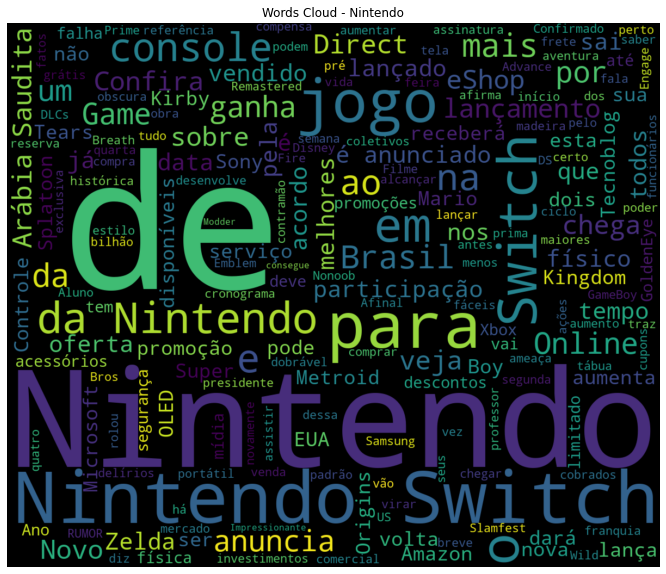

In [63]:
# Create a word cloud
Words_Cloud = WordCloud(
    width = 1200,
    height = 1000,    
    # Remove words
    #stopwords=['ao', 'Online', 'anunciado', 'confira', 'OLED', 'nos', 'da', 'de', 'The']
).generate ( Attach_News )

Figure, Axle = plt.subplots( figsize=(12,10))
plt.title('Words Cloud - Nintendo')
Axle.imshow( Words_Cloud, interpolation='bilinear')
Axle.set_axis_off()
plt.savefig('Words_Cloud_Analysis.png') # Exports the word cloud image to file sidebar